# Importing libraries

In [1]:
# import libraries

import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import scipy

# Importing data


In [2]:
# turn a project folder path into a string

path = r'/Users/mart/Documents/06-2022 Instacart Basket Analysis'

In [3]:
# import the "orders_products_merged.pkl"

ords_prods_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_merge.pkl'))

In [4]:
ords_prods_merge.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_time_order,add_to_cart_order,reordered,max_order,loyalty_flag,average_price,spending_flag,median_days_since_prior_order,order_frequency_flag
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,3.0,False,5,0,32,Regular customer,6.935811,Low spender,8.0,Frequent customer
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,20.0,False,1,1,32,Regular customer,6.935811,Low spender,8.0,Frequent customer
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,2,0,21,6.0,False,20,0,5,New customer,7.930208,Low spender,8.0,Frequent customer
3,1,Chocolate Sandwich Cookies,61,19,5.8,652770,764,1,3,13,NaN,True,10,0,3,New customer,4.972414,Low spender,9.0,Frequent customer
4,1,Chocolate Sandwich Cookies,61,19,5.8,1813452,764,3,4,17,9.0,False,11,1,3,New customer,4.972414,Low spender,9.0,Frequent customer


In [5]:
ords_prods_merge.isnull().sum()

product_id                             0
product_name                           0
aisle_id                               0
department_id                          0
prices                              5127
order_id                               0
user_id                                0
order_number                           0
orders_day_of_week                     0
order_hour_of_day                      0
days_since_prior_order           2076096
first_time_order                       0
add_to_cart_order                      0
reordered                              0
max_order                              0
loyalty_flag                           0
average_price                          0
spending_flag                          0
median_days_since_prior_order          5
order_frequency_flag                   5
dtype: int64

In [6]:
ords_prods_merge.shape

(32404859, 20)

# Bar Charts

<AxesSubplot:>

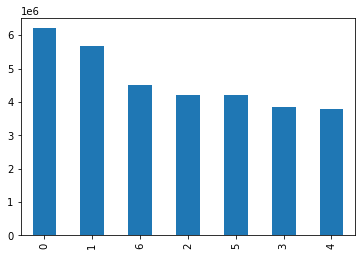

In [7]:
# create a bar chart for the column “orders_day_of_week” 

ords_prods_merge['orders_day_of_week'].value_counts().plot.bar()

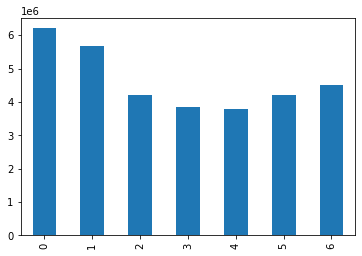

In [8]:
# sort the bars in the chart according to their index order (rather than largest to smallest)

bar = ords_prods_merge['orders_day_of_week'].value_counts().sort_index().plot.bar()

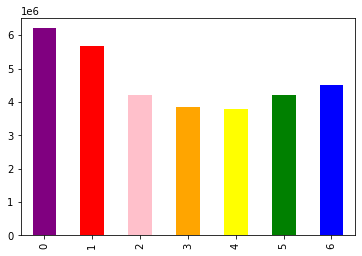

In [9]:
# adding a color argument in the plot.bar()

bar = ords_prods_merge['orders_day_of_week'].value_counts().sort_index().plot.bar(color = ['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

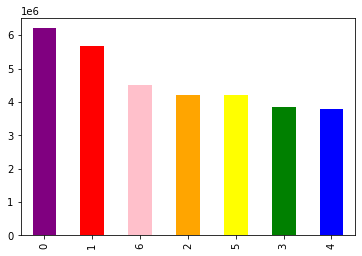

In [10]:
# save bar chart within the bar object

bar = ords_prods_merge['orders_day_of_week'].value_counts().plot.bar(color = ['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

In [11]:
# export a bar chart outside of Jupyter in the form of an image file

bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

# Histograms and Scatterplots

<AxesSubplot:ylabel='Frequency'>

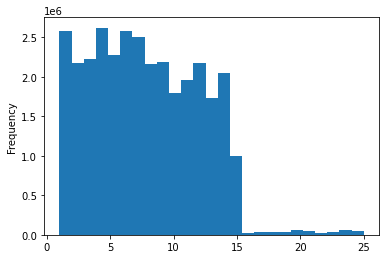

In [12]:
# create a histogram of the “prices” column

ords_prods_merge['prices'].plot.hist(bins = 25)

In [13]:
ords_prods_merge['prices'].describe()

count    3.239973e+07
mean     7.790994e+00
std      4.241809e+00
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      2.500000e+01
Name: prices, dtype: float64

In [14]:
ords_prods_merge['prices'].mean()

7.790994092392491

In [15]:
ords_prods_merge['prices'].median()

7.4

In [16]:
ords_prods_merge['prices'].max()

25.0

<AxesSubplot:xlabel='prices', ylabel='prices'>

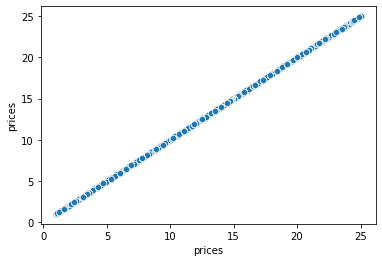

In [17]:
# create a scaterplot of the “prices” column

sns.scatterplot(x = 'prices', y = 'prices', data = ords_prods_merge)

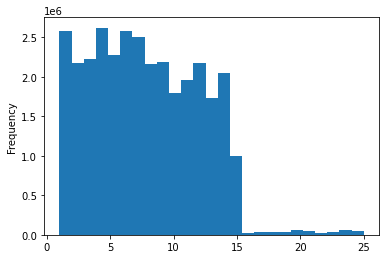

In [18]:
# create a histogram for 'prices' column after data cleaning

hist = ords_prods_merge['prices'].plot.hist(bins = 25)

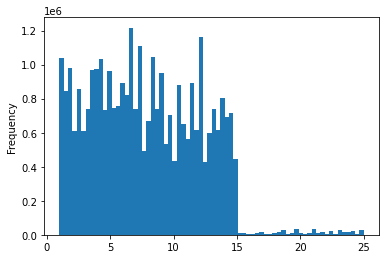

In [19]:
# create a histogram for 'prices' column with increased number of bins

hist = ords_prods_merge['prices'].plot.hist(bins = 70)

In [20]:
# export histogram

hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_prices.png'))

# Sampling Data

In [21]:
# set the seed for the random number generator

np.random.seed(4)

In [22]:
# create a List holding True/False values to the test np.random.rand() <= 0.7


dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [23]:
# store 70% of the sample in the dataframe big

big = ords_prods_merge[dev]

In [24]:
# store 30% of the sample in the dataframe small

small = ords_prods_merge[~dev]

In [25]:
# check if we get the same numbers of rows as ords_prods_merge has

len(ords_prods_merge)

32404859

In [26]:
len(big)+len(small)

32404859

In [27]:
# reduce the samples to 'orders_day_of_the_week' and 'prices'

df_2 = small[['orders_day_of_week','prices']]

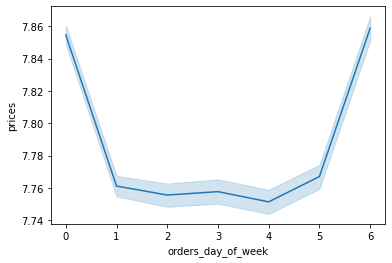

In [28]:
# create a line chart

line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')

# Export chart

In [29]:
# export a line chart

line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_ords_dow_prices.png'))

In [30]:
crosstab = pd.crosstab(ords_prods_merge['days_since_prior_order'], ords_prods_merge['order_number'], dropna = False)
crosstab

In [31]:
crosstab.to_clipboard()

In [32]:
ords_prods_merge.columns

Index(['product_id', 'product_name', 'aisle_id', 'department_id', 'prices',
       'order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'first_time_order',
       'add_to_cart_order', 'reordered', 'max_order', 'loyalty_flag',
       'average_price', 'spending_flag', 'median_days_since_prior_order',
       'order_frequency_flag'],
      dtype='object')